## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_style('white')

from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from imblearn.combine import SMOTEENN
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Data Understanding

In [2]:
path = '/content/ispu_dki_all.csv'

df = pd.read_csv(path)
df

tanggal              stasiun  pm10   pm25   so2    co    o3   no2  \
0     2010-01-01   DKI1 (Bunderan HI)  60.0    NaN   4.0  73.0  27.0  14.0   
1     2010-01-02   DKI1 (Bunderan HI)  32.0    NaN   2.0  16.0  33.0   9.0   
2     2010-01-03   DKI1 (Bunderan HI)  27.0    NaN   2.0  19.0  20.0   9.0   
3     2010-01-04   DKI1 (Bunderan HI)  22.0    NaN   2.0  16.0  15.0   6.0   
4     2010-01-05   DKI1 (Bunderan HI)  25.0    NaN   2.0  17.0  15.0   8.0   
...          ...                  ...   ...    ...   ...   ...   ...   ...   
4621  2023-11-26   DKI1 (Bunderan HI)  55.0   75.0  43.0  15.0  15.0  25.0   
4622  2023-11-27     DKI3 (Jagakarsa)  54.0   77.0  56.0  13.0  27.0  16.0   
4623  2023-11-28   DKI1 (Bunderan HI)  62.0   96.0  45.0  15.0  29.0  34.0   
4624  2023-11-29  DKI4 (Lubang Buaya)  71.0  105.0  30.0  19.0  22.0  14.0   
4625  2023-11-30   DKI1 (Bunderan HI)  38.0   67.0  43.0  12.0  34.0  34.0   

        max critical     categori  
0      73.0       CO       SEDANG  
1      33.0       O3         BAIK  
2      27.0     PM10         BAIK  
3      22.0     PM10         BAIK  
4      25.0     PM10         BAIK  
...     ...      ...          ...  
4621   75.0     PM25       SEDANG  
4622   77.0     PM25       SEDANG  
4623   96.0     PM25       SEDANG  
4624  105.0     PM25  TIDAK SEHAT  
4625   67.0     PM25       SEDANG  

[4626 rows x 11 columns]

In [3]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [4]:
df = df[df.tanggal >= '2021-02-01']
df.reset_index(drop=True, inplace=True)
df

tanggal              stasiun  pm10   pm25   so2    co    o3   no2  \
0   2021-02-01   DKI5 (Kebon Jeruk)  73.0  126.0  38.0  26.0  46.0  34.0   
1   2021-02-02     DKI3 (Jagakarsa)  53.0   70.0  40.0  14.0  55.0  25.0   
2   2021-02-03     DKI3 (Jagakarsa)  32.0   53.0  40.0  11.0  42.0  19.0   
3   2021-02-04   DKI5 (Kebon Jeruk)  36.0   59.0  40.0  14.0  47.0  24.0   
4   2021-02-05     DKI3 (Jagakarsa)  29.0   51.0  40.0  14.0  45.0  35.0   
..         ...                  ...   ...    ...   ...   ...   ...   ...   
718 2023-11-26   DKI1 (Bunderan HI)  55.0   75.0  43.0  15.0  15.0  25.0   
719 2023-11-27     DKI3 (Jagakarsa)  54.0   77.0  56.0  13.0  27.0  16.0   
720 2023-11-28   DKI1 (Bunderan HI)  62.0   96.0  45.0  15.0  29.0  34.0   
721 2023-11-29  DKI4 (Lubang Buaya)  71.0  105.0  30.0  19.0  22.0  14.0   
722 2023-11-30   DKI1 (Bunderan HI)  38.0   67.0  43.0  12.0  34.0  34.0   

       max critical     categori  
0    126.0     PM25  TIDAK SEHAT  
1     70.0     PM25       SEDANG  
2     53.0     PM25       SEDANG  
3     59.0     PM25       SEDANG  
4     51.0     PM25       SEDANG  
..     ...      ...          ...  
718   75.0     PM25       SEDANG  
719   77.0     PM25       SEDANG  
720   96.0     PM25       SEDANG  
721  105.0     PM25  TIDAK SEHAT  
722   67.0     PM25       SEDANG  

[723 rows x 11 columns]

In [5]:
df.shape

(723, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   723 non-null    datetime64[ns]
 1   stasiun   723 non-null    object        
 2   pm10      563 non-null    float64       
 3   pm25      722 non-null    float64       
 4   so2       717 non-null    float64       
 5   co        716 non-null    float64       
 6   o3        718 non-null    float64       
 7   no2       715 non-null    float64       
 8   max       723 non-null    float64       
 9   critical  722 non-null    object        
 10  categori  723 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 62.3+ KB


In [7]:
cats = [i for i in df.columns if df[i].dtype == 'O']

for i in cats:
  print(f'{i} : {df[i].unique()}')

stasiun : ['DKI5 (Kebon Jeruk)' 'DKI3 (Jagakarsa)' 'DKI2 (Kelapa Gading)'
 'DKI4 (Lubang Buaya)' 'DKI1 (Bunderan HI)']
critical : ['PM25' 'O3' 'PM10' 'SO2' nan]
categori : ['TIDAK SEHAT' 'SEDANG' 'BAIK' 'SANGAT TIDAK SEHAT' 'TIDAK ADA DATA']


In [8]:
for i in cats:
  print(f'{i} : {df[i].value_counts()}')

stasiun : stasiun
DKI4 (Lubang Buaya)     512
DKI3 (Jagakarsa)         91
DKI2 (Kelapa Gading)     67
DKI5 (Kebon Jeruk)       35
DKI1 (Bunderan HI)       18
Name: count, dtype: int64
critical : critical
PM25    664
O3       28
SO2      26
PM10      4
Name: count, dtype: int64
categori : categori
SEDANG                404
TIDAK SEHAT           306
BAIK                    9
SANGAT TIDAK SEHAT      3
TIDAK ADA DATA          1
Name: count, dtype: int64


In [9]:
modulus_categori = df['categori'].mode()[0]
#modulus_critical = df['critical'].mode()[0]

df['categori'] = df['categori'].replace(df['categori'].value_counts()[df['categori'].value_counts() == 1].index, modulus_categori)
#df['critical'] = df['critical'].replace(df['critical'].value_counts()[df['critical'].value_counts() == 1].index, modulus_critical)
df['categori'] = df['categori'].replace('SANGAT TIDAK SEHAT', 'TIDAK SEHAT')

In [10]:
duplicate_dates = df[df.duplicated(subset=['tanggal'], keep=False)]['tanggal']

if not duplicate_dates.empty:
  print("Tanggal yang duplikat:")
  print(duplicate_dates)
else:
  print("Tidak ada tanggal yang duplikat.")

Tidak ada tanggal yang duplikat.


In [11]:
df.describe()

tanggal        pm10        pm25         so2  \
count                            723  563.000000  722.000000  717.000000   
mean   2022-07-08 08:47:48.049792512   59.834813   94.422438   43.919107   
min              2021-02-01 00:00:00    3.000000   23.000000   13.000000   
25%              2021-07-31 12:00:00   51.000000   76.250000   34.000000   
50%              2022-12-04 00:00:00   61.000000   94.000000   44.000000   
75%              2023-06-02 12:00:00   69.000000  111.000000   53.000000   
max              2023-11-30 00:00:00  179.000000  287.000000   89.000000   
std                              NaN   17.242753   27.416654   11.888995   

               co          o3         no2         max  
count  716.000000  718.000000  715.000000  723.000000  
mean    16.135475   36.711699   22.853147   95.408022  
min      1.000000    6.000000    1.000000    0.000000  
25%     11.000000   21.000000   15.000000   77.000000  
50%     15.000000   33.000000   20.000000   95.000000  
75%     20.000000   51.000000   30.000000  111.000000  
max     54.000000  181.000000   65.000000  287.000000  
std      7.169073   21.122124   10.952634   27.115088

In [12]:
col_cats = ['critical', 'categori', 'stasiun']

df[col_cats].describe()

critical categori              stasiun
count       722      723                  723
unique        4        3                    5
top        PM25   SEDANG  DKI4 (Lubang Buaya)
freq        664      405                  512

## Data Cleansing

In [13]:
df.isnull().sum() * 100 / len(df)

tanggal      0.000000
stasiun      0.000000
pm10        22.130014
pm25         0.138313
so2          0.829876
co           0.968188
o3           0.691563
no2          1.106501
max          0.000000
critical     0.138313
categori     0.000000
dtype: float64

In [14]:
df['tahun'] = df['tanggal'].dt.year
for year in df['tahun'].unique():
  null_count = df[df['tahun'] == year]['pm25'].isnull().sum()
  print(f"Jumlah nilai null pada kolom pm25 di tahun {year}: {null_count}")

Jumlah nilai null pada kolom pm25 di tahun 2021: 0
Jumlah nilai null pada kolom pm25 di tahun 2022: 0
Jumlah nilai null pada kolom pm25 di tahun 2023: 1


In [15]:
df['pm10'] = df['pm10'].interpolate(method='linear')
df['pm25'] = df['pm25'].interpolate(method='linear')
df['so2'] = df['so2'].interpolate(method='linear')
df['co'] = df['co'].interpolate(method='linear')
df['o3'] = df['o3'].interpolate(method='linear')
df['no2'] = df['no2'].interpolate(method='linear')

In [16]:
df['critical'] = df['critical'].fillna(df['critical'].mode()[0])

In [17]:
df.isnull().sum()

tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
tahun       0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df = df.iloc[:, :-1]
df.head()

tanggal             stasiun  pm10   pm25   so2    co    o3   no2    max  \
0 2021-02-01  DKI5 (Kebon Jeruk)  73.0  126.0  38.0  26.0  46.0  34.0  126.0   
1 2021-02-02    DKI3 (Jagakarsa)  53.0   70.0  40.0  14.0  55.0  25.0   70.0   
2 2021-02-03    DKI3 (Jagakarsa)  32.0   53.0  40.0  11.0  42.0  19.0   53.0   
3 2021-02-04  DKI5 (Kebon Jeruk)  36.0   59.0  40.0  14.0  47.0  24.0   59.0   
4 2021-02-05    DKI3 (Jagakarsa)  29.0   51.0  40.0  14.0  45.0  35.0   51.0   

  critical     categori  
0     PM25  TIDAK SEHAT  
1     PM25       SEDANG  
2     PM25       SEDANG  
3     PM25       SEDANG  
4     PM25       SEDANG

In [20]:
df_eda = df.copy()

df_eda_num = df_eda.select_dtypes(include=np.number)
df_eda_cat = df_eda.select_dtypes(include='object')

df_eda_num.shape[1], df_eda_cat.shape[1]

(7, 3)

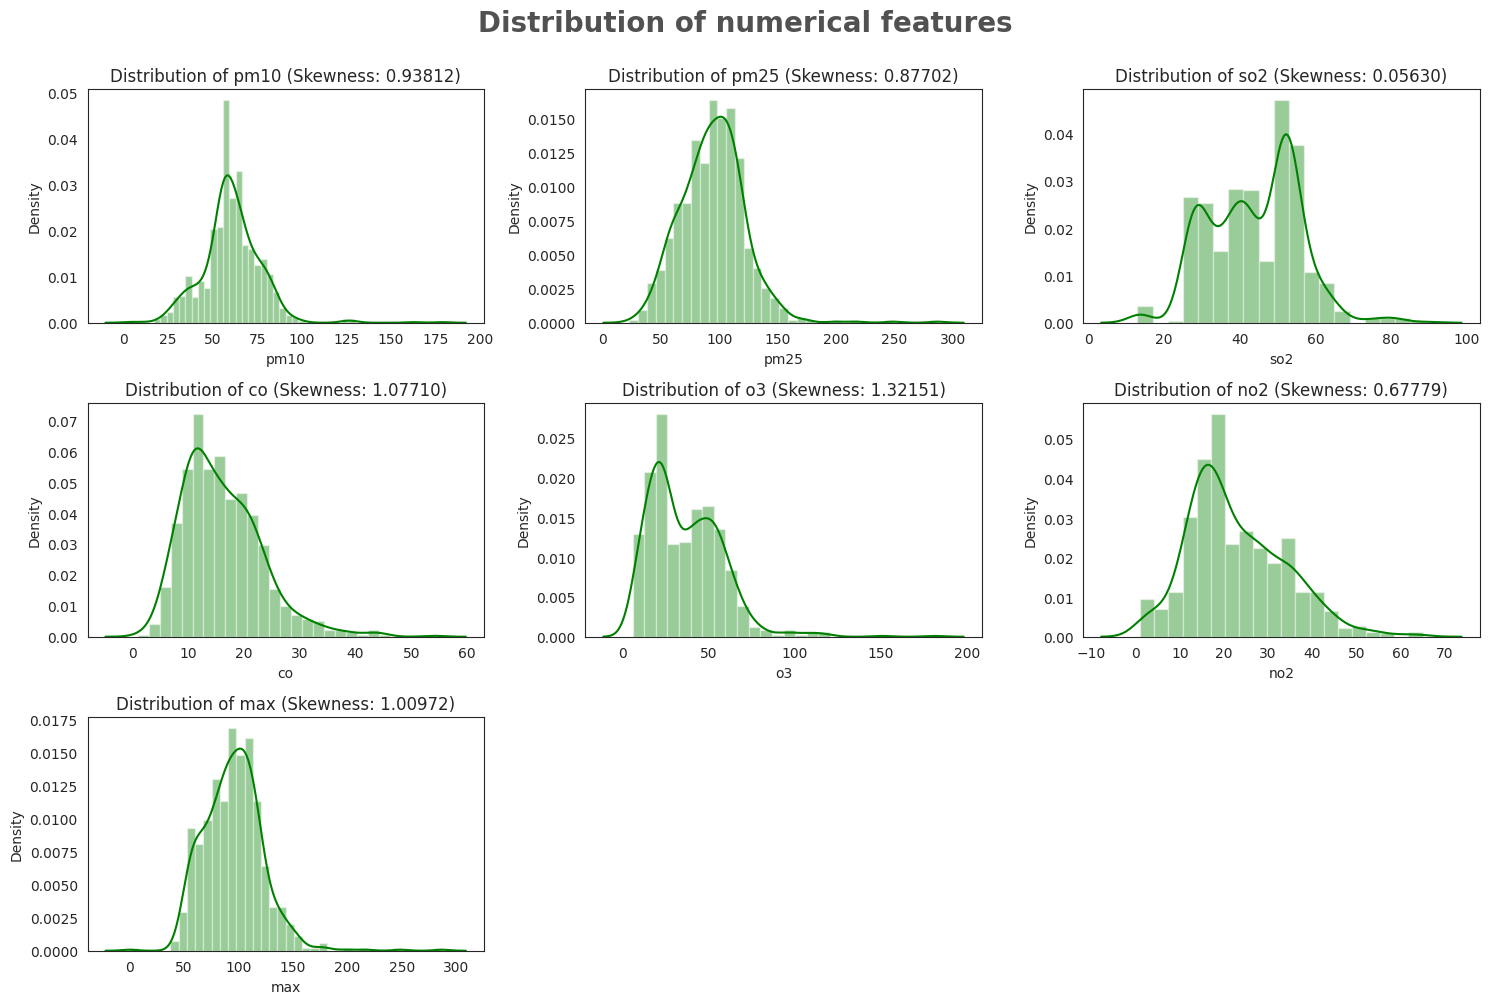

In [21]:
plt.figure(figsize=(15,10))
plt.suptitle('Distribution of numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_eda_num.columns)):
  plt.subplot(3, 3, i+1)
  sns.distplot(x=df_eda_num[df_eda_num.columns[i]], color='g')
  plt.title(f'Distribution of {df_eda_num.columns[i]} (Skewness: {skew(df_eda_num[df_eda_num.columns[i]]):.5f})')
  plt.xlabel(df_eda_num.columns[i])
  plt.tight_layout()

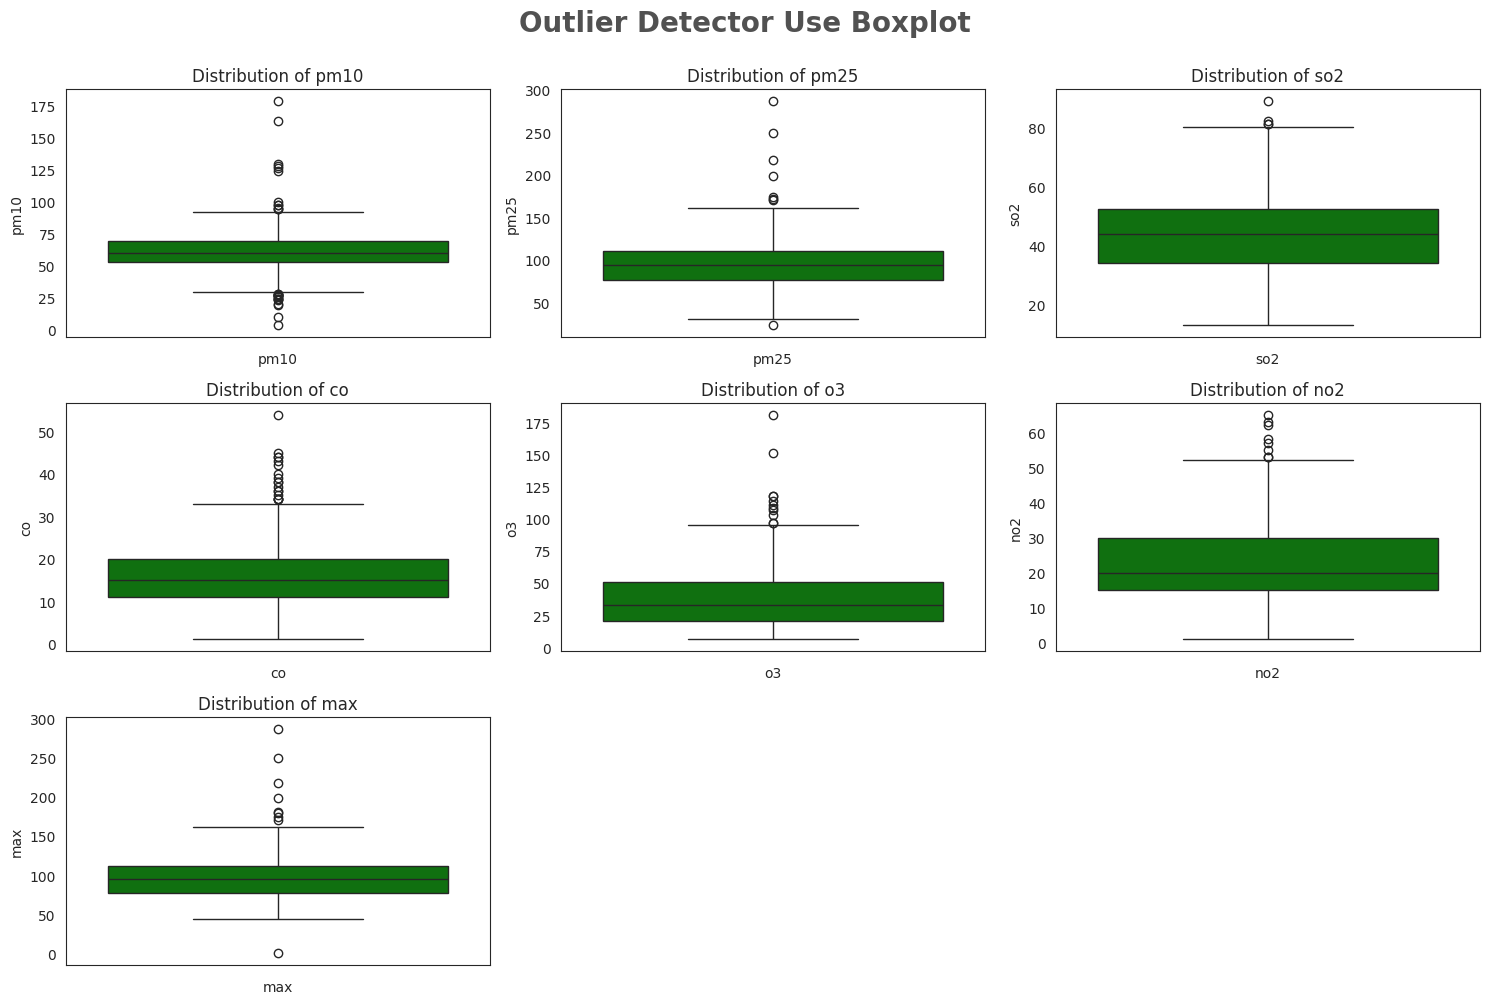

In [22]:
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Detector Use Boxplot', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_eda_num.columns)):
  plt.subplot(3, 3, i+1)
  sns.boxplot(y=df_eda_num[df_eda_num.columns[i]], color='g')
  plt.title(f"Distribution of {df_eda_num.columns[i]}")
  plt.xlabel(df_eda_num.columns[i])
  plt.tight_layout()

In [23]:
def check_outlier(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  return outliers

def remove_outlier(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return df_clean

In [24]:
def check_outliers_all_columns(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    outlier_counts = {}

    for col in numeric_columns:
        outliers = check_outlier(df, col)
        total_outliers = len(outliers)
        outlier_counts[col] = total_outliers

    for col, count in outlier_counts.items():
        print(f"Total outlier pada kolom {col}: {count}")


check_outliers_all_columns(df)

Total outlier pada kolom pm10: 28
Total outlier pada kolom pm25: 8
Total outlier pada kolom so2: 4
Total outlier pada kolom co: 18
Total outlier pada kolom o3: 11
Total outlier pada kolom no2: 8
Total outlier pada kolom max: 9


In [25]:
# def remove_outliers_all_columns(df):
#     numeric_columns = df.select_dtypes(include=['number']).columns

#     df_clean = df.copy()
#     for col in numeric_columns:
#         df_clean = remove_outlier(df_clean, col)

#     return df_clean

# df_clean = remove_outliers_all_columns(df)
# check_outliers_all_columns(df_clean)

## Eksploratory Data Analysis (EDA)

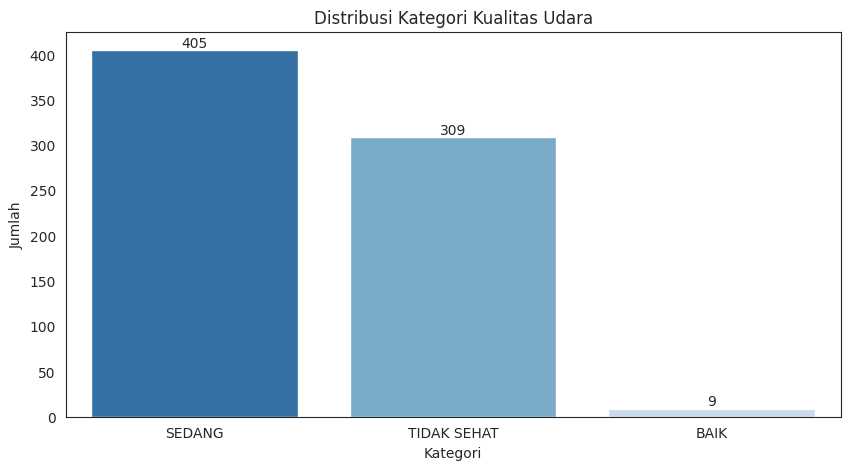

In [26]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='categori', data=df, order=df['categori'].value_counts().index, palette='Blues_r')
for container in ax.containers:
  ax.bar_label(container, size=10, label_type='edge')
plt.title('Distribusi Kategori Kualitas Udara')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

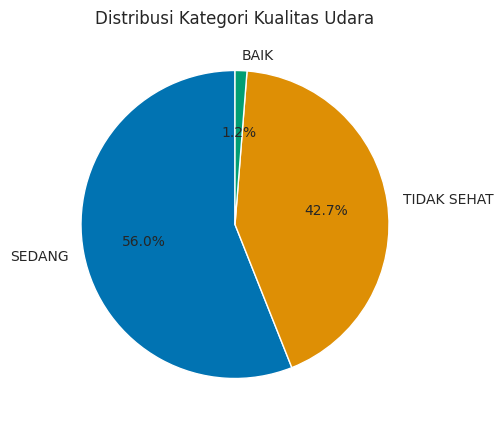

In [27]:
plt.figure(figsize=(10, 5))
plt.pie(df['categori'].value_counts(), labels=df['categori'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Distribusi Kategori Kualitas Udara')
plt.show()

In [28]:
df_timeseries = df.drop(columns=['stasiun', 'critical', 'categori'], axis=1)
df_timeseries.set_index('tanggal', inplace=True)
df_timeseries.head()

pm10   pm25   so2    co    o3   no2    max
tanggal                                               
2021-02-01  73.0  126.0  38.0  26.0  46.0  34.0  126.0
2021-02-02  53.0   70.0  40.0  14.0  55.0  25.0   70.0
2021-02-03  32.0   53.0  40.0  11.0  42.0  19.0   53.0
2021-02-04  36.0   59.0  40.0  14.0  47.0  24.0   59.0
2021-02-05  29.0   51.0  40.0  14.0  45.0  35.0   51.0

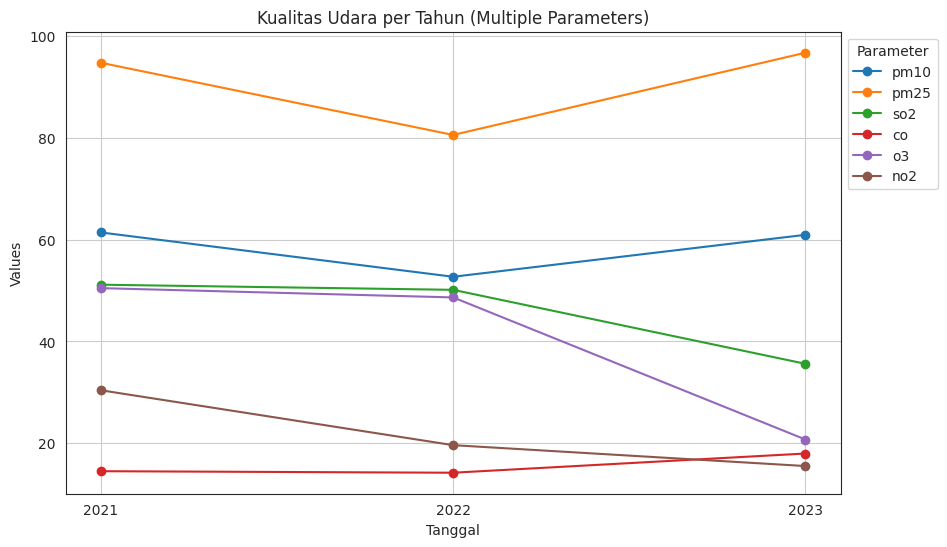

In [29]:
def aggregate_data(df, value_cols, freq='Y'):
    df_aggregated = df.resample(freq).mean()[value_cols].reset_index()
    return df_aggregated

def plot_time_series_multi(df, date_col, value_cols, title='Time Series Plot'):
    plt.figure(figsize=(10, 6))

    for col in value_cols:
        plt.plot(df[date_col], df[col], marker='o', label=col)

    plt.title(title)
    plt.xlabel('Tanggal')
    plt.ylabel('Values')
    plt.grid(True)
    plt.legend(title='Parameter', bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(df[date_col], df[date_col].dt.year)
    plt.show()

list_senyawa = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']
aggregated_data_y = aggregate_data(df_timeseries, list_senyawa, freq='Y')

plot_time_series_multi(aggregated_data_y, 'tanggal', list_senyawa, title='Kualitas Udara per Tahun (Multiple Parameters)')

In [30]:
df_timeseries_2 = df_timeseries.copy()
df_timeseries_2.reset_index(inplace=True)

df_timeseries_day = df_timeseries_2[df_timeseries_2['tanggal'] >= '2023-01-01']
df_timeseries_day.set_index('tanggal', inplace=True)
df_timeseries_day

pm10   pm25   so2    co    o3   no2    max
tanggal                                               
2023-01-01  44.0   61.0  56.0  16.0  20.0  19.0   61.0
2023-01-02  34.0   43.0  59.0  15.0  21.0  19.0   59.0
2023-01-03  28.0   34.0  57.0  13.0  21.0  16.0   57.0
2023-01-04  31.0   49.0  60.0  17.0  21.0  26.0   60.0
2023-01-05  40.0   59.0  53.0  10.0  18.0   7.0   59.0
...          ...    ...   ...   ...   ...   ...    ...
2023-11-26  55.0   75.0  43.0  15.0  15.0  25.0   75.0
2023-11-27  54.0   77.0  56.0  13.0  27.0  16.0   77.0
2023-11-28  62.0   96.0  45.0  15.0  29.0  34.0   96.0
2023-11-29  71.0  105.0  30.0  19.0  22.0  14.0  105.0
2023-11-30  38.0   67.0  43.0  12.0  34.0  34.0   67.0

[334 rows x 7 columns]

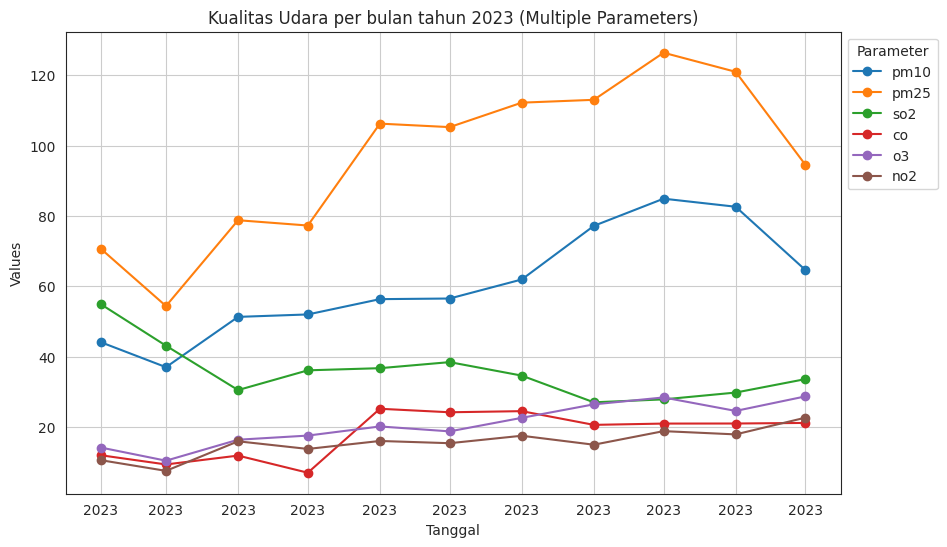

In [31]:
aggregated_data_m = aggregate_data(df_timeseries_day, list_senyawa, freq='M')

plot_time_series_multi(aggregated_data_m, 'tanggal', list_senyawa, title='Kualitas Udara per bulan tahun 2023 (Multiple Parameters)')

In [32]:
df.groupby('stasiun')[list_senyawa].agg('mean').round(2)

pm10    pm25    so2     co     o3    no2
stasiun                                                        
DKI1 (Bunderan HI)    55.36   82.72  44.22  14.92  28.47  30.72
DKI2 (Kelapa Gading)  52.03   73.96  51.54  15.75  59.36  26.15
DKI3 (Jagakarsa)      49.34   72.90  44.09  11.35  29.97  15.86
DKI4 (Lubang Buaya)   63.77  101.60  42.59  16.93  34.14  22.59
DKI5 (Kebon Jeruk)    60.83   92.74  47.49  17.69  50.29  31.80

## Feature Engineering

In [33]:
df2 = df.copy()
df2.reset_index(drop=True, inplace=True)
#df2.drop(columns=['tanggal'], inplace=True)
df2['year'] = df2['tanggal'].dt.year
df2['month'] = df2['tanggal'].dt.month
df2['day'] = df2['tanggal'].dt.day
df2

tanggal              stasiun  pm10   pm25   so2    co    o3   no2  \
0   2021-02-01   DKI5 (Kebon Jeruk)  73.0  126.0  38.0  26.0  46.0  34.0   
1   2021-02-02     DKI3 (Jagakarsa)  53.0   70.0  40.0  14.0  55.0  25.0   
2   2021-02-03     DKI3 (Jagakarsa)  32.0   53.0  40.0  11.0  42.0  19.0   
3   2021-02-04   DKI5 (Kebon Jeruk)  36.0   59.0  40.0  14.0  47.0  24.0   
4   2021-02-05     DKI3 (Jagakarsa)  29.0   51.0  40.0  14.0  45.0  35.0   
..         ...                  ...   ...    ...   ...   ...   ...   ...   
718 2023-11-26   DKI1 (Bunderan HI)  55.0   75.0  43.0  15.0  15.0  25.0   
719 2023-11-27     DKI3 (Jagakarsa)  54.0   77.0  56.0  13.0  27.0  16.0   
720 2023-11-28   DKI1 (Bunderan HI)  62.0   96.0  45.0  15.0  29.0  34.0   
721 2023-11-29  DKI4 (Lubang Buaya)  71.0  105.0  30.0  19.0  22.0  14.0   
722 2023-11-30   DKI1 (Bunderan HI)  38.0   67.0  43.0  12.0  34.0  34.0   

       max critical     categori  year  month  day  
0    126.0     PM25  TIDAK SEHAT  2021      2    1  
1     70.0     PM25       SEDANG  2021      2    2  
2     53.0     PM25       SEDANG  2021      2    3  
3     59.0     PM25       SEDANG  2021      2    4  
4     51.0     PM25       SEDANG  2021      2    5  
..     ...      ...          ...   ...    ...  ...  
718   75.0     PM25       SEDANG  2023     11   26  
719   77.0     PM25       SEDANG  2023     11   27  
720   96.0     PM25       SEDANG  2023     11   28  
721  105.0     PM25  TIDAK SEHAT  2023     11   29  
722   67.0     PM25       SEDANG  2023     11   30  

[723 rows x 14 columns]

In [34]:
df2.drop(columns=['tanggal'], inplace=True)

In [35]:
df2.categori.unique()

array(['TIDAK SEHAT', 'SEDANG', 'BAIK'], dtype=object)

In [36]:
le = LabelEncoder()

df2['categori'] = le.fit_transform(df2['categori'])
df2.categori.unique()

array([2, 1, 0])

In [37]:
le.classes_

array(['BAIK', 'SEDANG', 'TIDAK SEHAT'], dtype=object)

In [38]:
df2.categori.head()

0    2
1    1
2    1
3    1
4    1
Name: categori, dtype: int64

In [39]:
df2.stasiun.unique(), df2.critical.unique()

(array(['DKI5 (Kebon Jeruk)', 'DKI3 (Jagakarsa)', 'DKI2 (Kelapa Gading)',
        'DKI4 (Lubang Buaya)', 'DKI1 (Bunderan HI)'], dtype=object),
 array(['PM25', 'O3', 'PM10', 'SO2'], dtype=object))

In [40]:
ohe = OneHotEncoder(drop='first')

col_ohe = ['stasiun', 'critical']

for i in col_ohe:
  ohe.fit(df2[[i]])
  df_ohe = pd.DataFrame(ohe.transform(df2[[i]]).toarray(), columns=ohe.get_feature_names_out([i]))
  df2 = pd.concat([df2, df_ohe], axis=1)

df2

stasiun  pm10   pm25   so2    co    o3   no2    max critical  \
0     DKI5 (Kebon Jeruk)  73.0  126.0  38.0  26.0  46.0  34.0  126.0     PM25   
1       DKI3 (Jagakarsa)  53.0   70.0  40.0  14.0  55.0  25.0   70.0     PM25   
2       DKI3 (Jagakarsa)  32.0   53.0  40.0  11.0  42.0  19.0   53.0     PM25   
3     DKI5 (Kebon Jeruk)  36.0   59.0  40.0  14.0  47.0  24.0   59.0     PM25   
4       DKI3 (Jagakarsa)  29.0   51.0  40.0  14.0  45.0  35.0   51.0     PM25   
..                   ...   ...    ...   ...   ...   ...   ...    ...      ...   
718   DKI1 (Bunderan HI)  55.0   75.0  43.0  15.0  15.0  25.0   75.0     PM25   
719     DKI3 (Jagakarsa)  54.0   77.0  56.0  13.0  27.0  16.0   77.0     PM25   
720   DKI1 (Bunderan HI)  62.0   96.0  45.0  15.0  29.0  34.0   96.0     PM25   
721  DKI4 (Lubang Buaya)  71.0  105.0  30.0  19.0  22.0  14.0  105.0     PM25   
722   DKI1 (Bunderan HI)  38.0   67.0  43.0  12.0  34.0  34.0   67.0     PM25   

     categori  year  month  day  stasiun_DKI2 (Kelapa Gading)  \
0           2  2021      2    1                           0.0   
1           1  2021      2    2                           0.0   
2           1  2021      2    3                           0.0   
3           1  2021      2    4                           0.0   
4           1  2021      2    5                           0.0   
..        ...   ...    ...  ...                           ...   
718         1  2023     11   26                           0.0   
719         1  2023     11   27                           0.0   
720         1  2023     11   28                           0.0   
721         2  2023     11   29                           0.0   
722         1  2023     11   30                           0.0   

     stasiun_DKI3 (Jagakarsa)  stasiun_DKI4 (Lubang Buaya)  \
0                         0.0                          0.0   
1                         1.0                          0.0   
2                         1.0                          0.0   
3                         0.0                          0.0   
4                         1.0                          0.0   
..                        ...                          ...   
718                       0.0                          0.0   
719                       1.0                          0.0   
720                       0.0                          0.0   
721                       0.0                          1.0   
722                       0.0                          0.0   

     stasiun_DKI5 (Kebon Jeruk)  critical_PM10  critical_PM25  critical_SO2  
0                           1.0            0.0            1.0           0.0  
1                           0.0            0.0            1.0           0.0  
2                           0.0            0.0            1.0           0.0  
3                           1.0            0.0            1.0           0.0  
4                           0.0            0.0            1.0           0.0  
..                          ...            ...            ...           ...  
718                         0.0            0.0            1.0           0.0  
719                         0.0            0.0            1.0           0.0  
720                         0.0            0.0            1.0           0.0  
721                         0.0            0.0            1.0           0.0  
722                         0.0            0.0            1.0           0.0  

[723 rows x 20 columns]

In [41]:
df2.drop(columns=col_ohe, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pm10                          723 non-null    float64
 1   pm25                          723 non-null    float64
 2   so2                           723 non-null    float64
 3   co                            723 non-null    float64
 4   o3                            723 non-null    float64
 5   no2                           723 non-null    float64
 6   max                           723 non-null    float64
 7   categori                      723 non-null    int64  
 8   year                          723 non-null    int32  
 9   month                         723 non-null    int32  
 10  day                           723 non-null    int32  
 11  stasiun_DKI2 (Kelapa Gading)  723 non-null    float64
 12  stasiun_DKI3 (Jagakarsa)      723 non-null    float64
 13  stasi

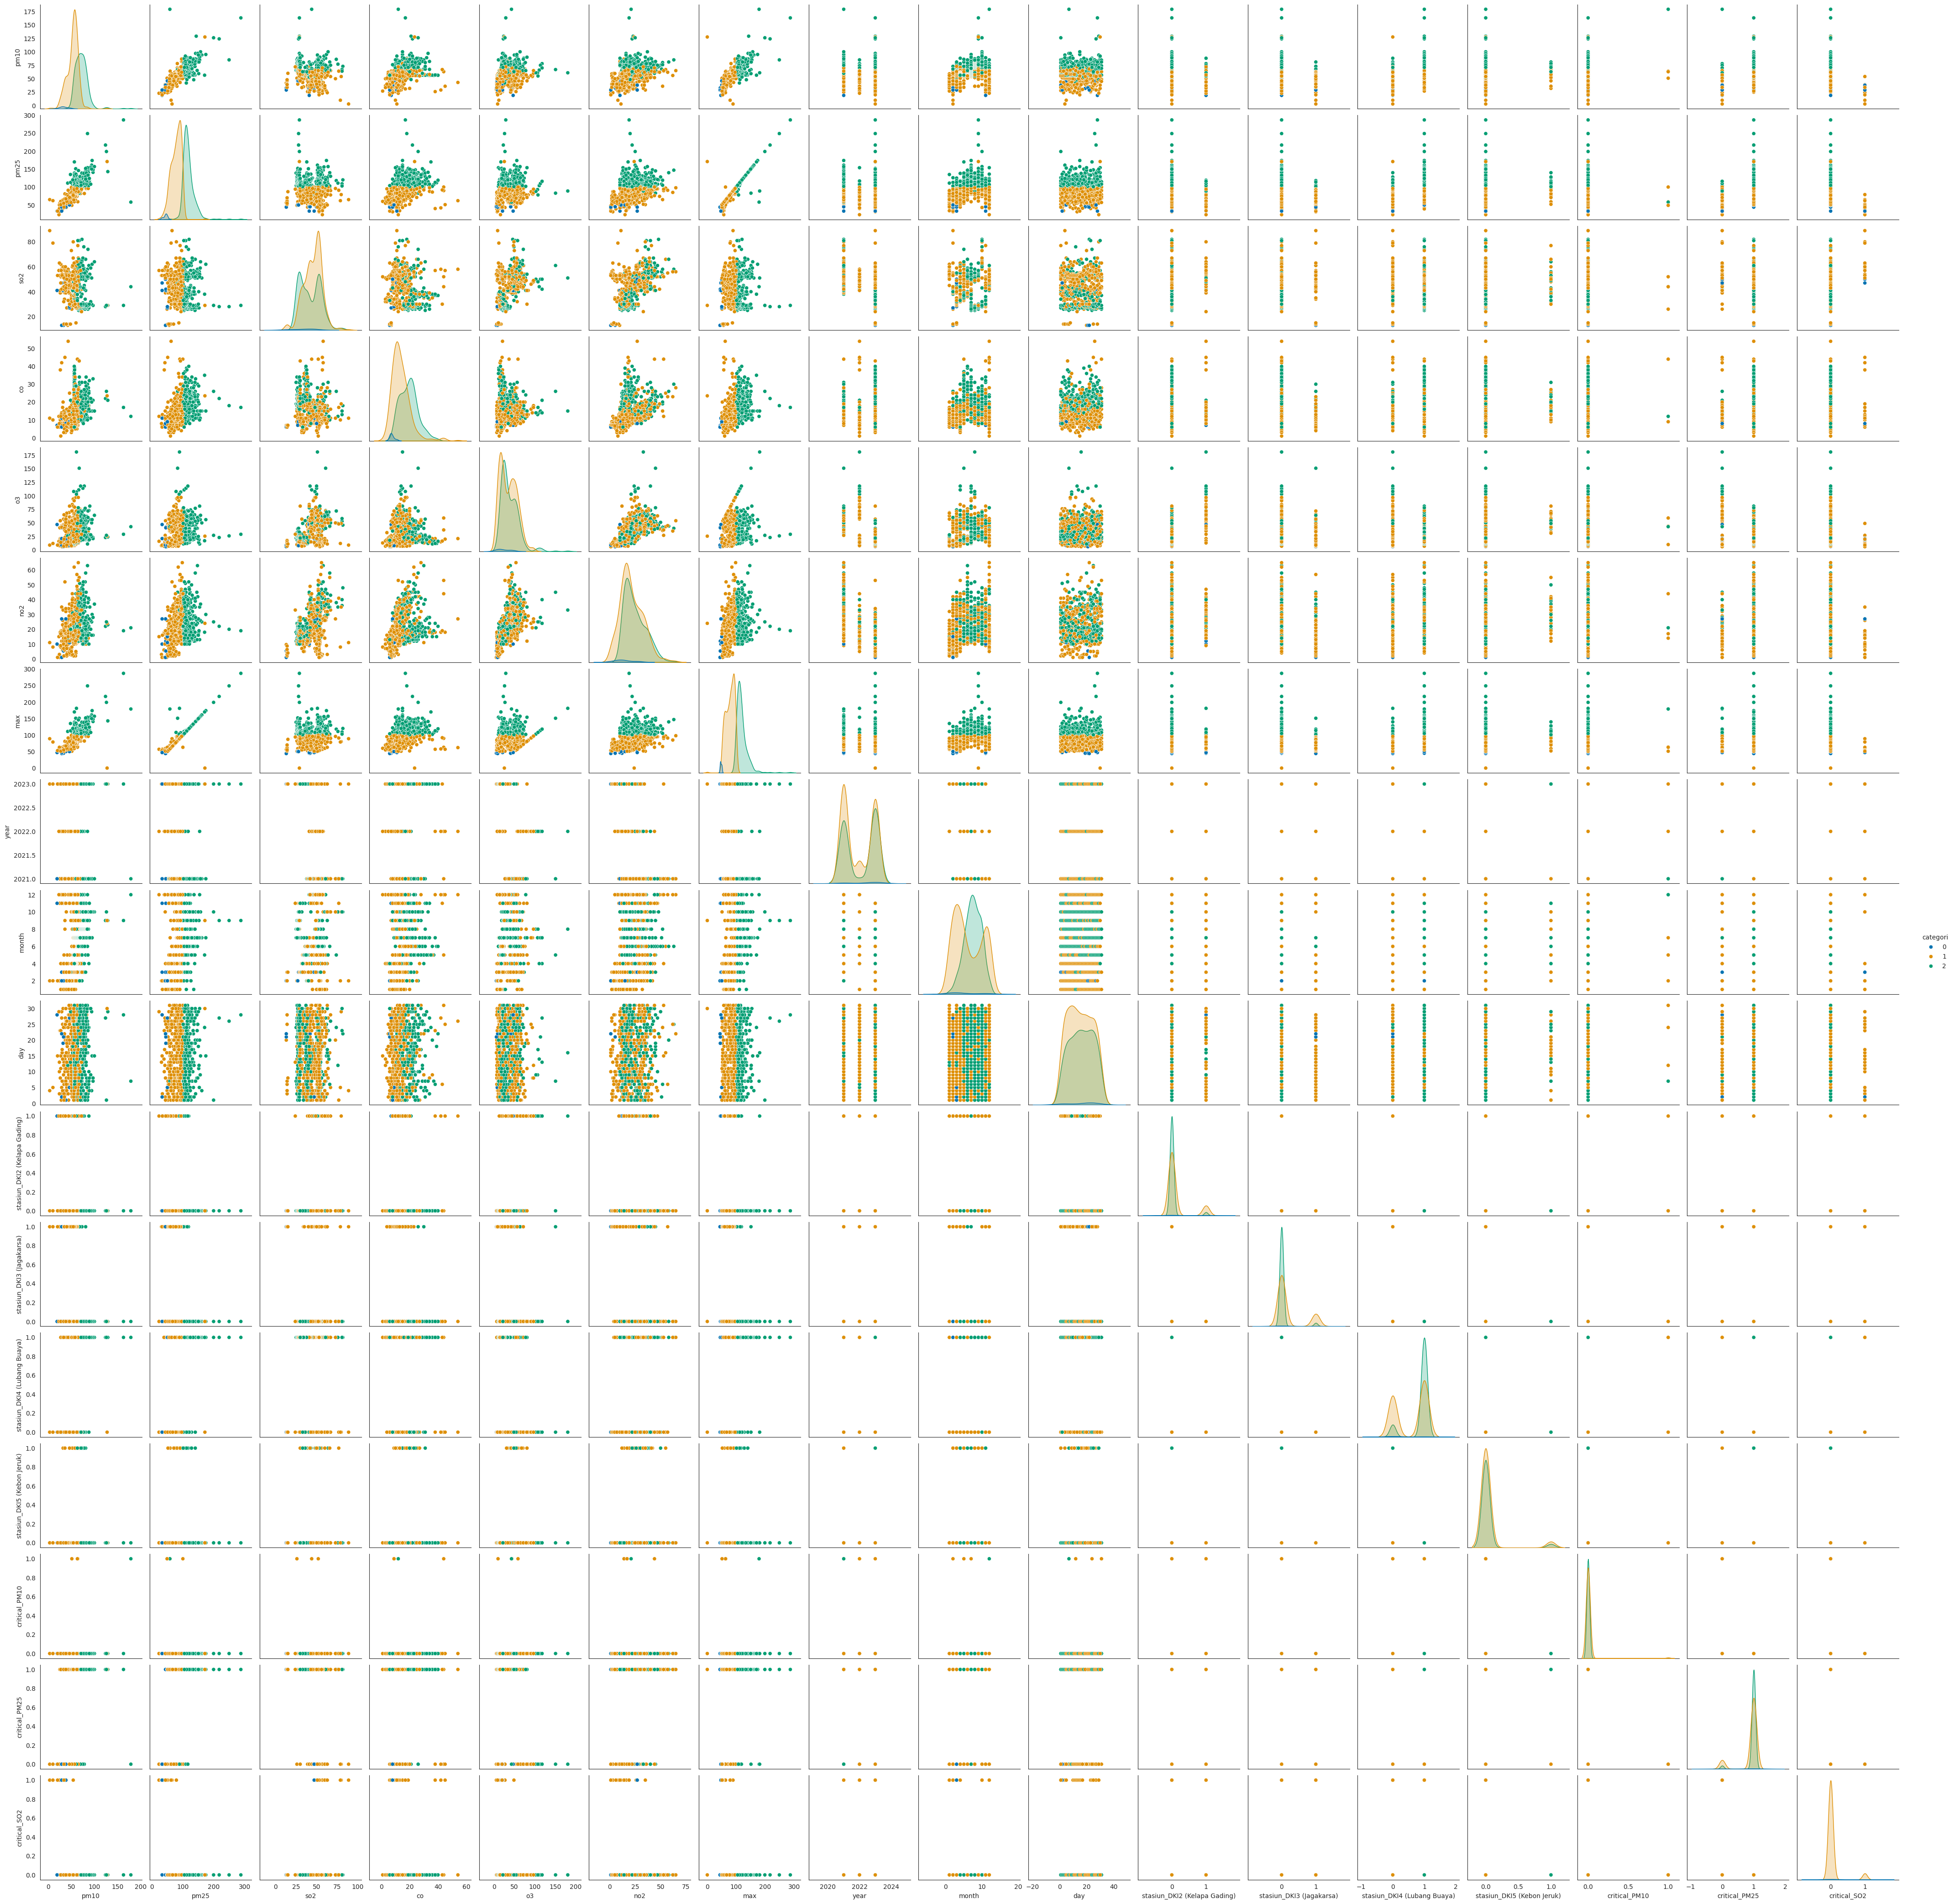

In [42]:
sns.pairplot(df2, hue='categori', palette='colorblind')

<Axes: >

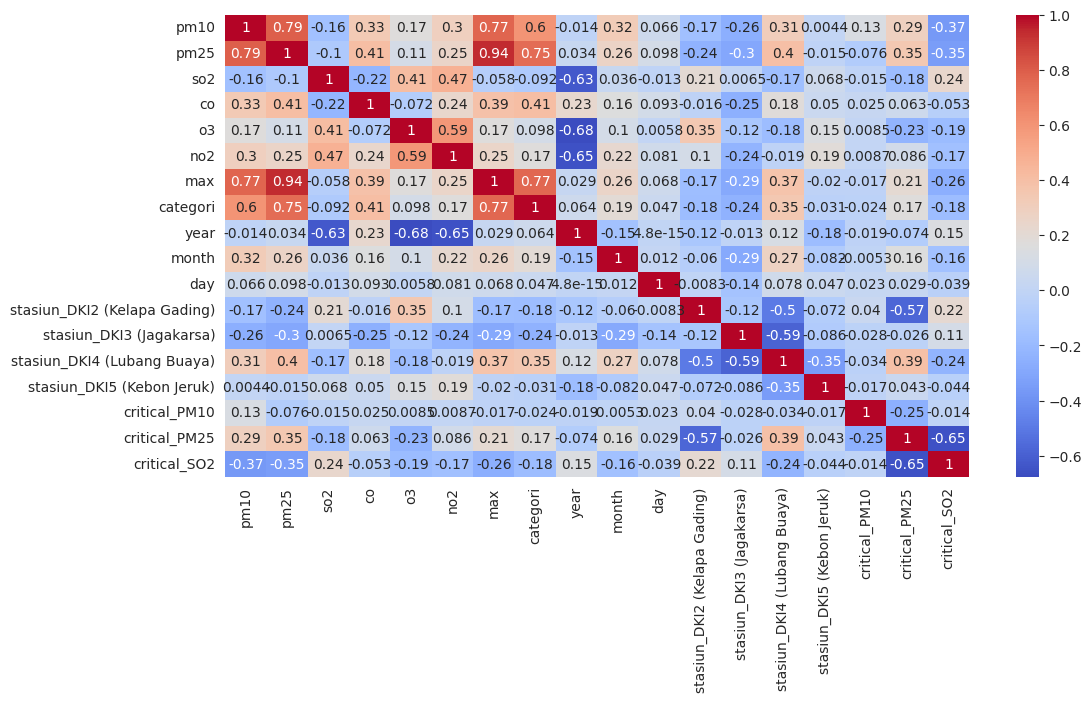

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

## Model Selection

In [44]:
X = df2.drop(columns=['categori'], axis=1)
y = df2['categori']

In [45]:
df2.categori.value_counts()

categori
1    405
2    309
0      9
Name: count, dtype: int64

In [46]:
sme = SMOTEENN(sampling_strategy='auto', random_state=24)
X_res, y_res = sme.fit_resample(X, y)
y_res.value_counts()

categori
0    405
2    376
1    349
Name: count, dtype: int64

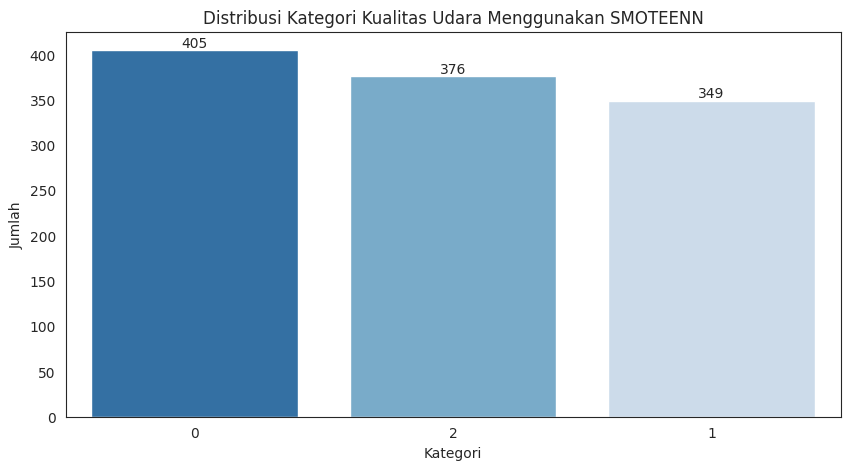

In [47]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=y_res, order=y_res.value_counts().index, palette='Blues_r')
for container in ax.containers:
  ax.bar_label(container, size=10, label_type='edge')
plt.title('Distribusi Kategori Kualitas Udara Menggunakan SMOTEENN')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [49]:
X_train.columns

Index(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max', 'year', 'month', 'day',
       'stasiun_DKI2 (Kelapa Gading)', 'stasiun_DKI3 (Jagakarsa)',
       'stasiun_DKI4 (Lubang Buaya)', 'stasiun_DKI5 (Kebon Jeruk)',
       'critical_PM10', 'critical_PM25', 'critical_SO2'],
      dtype='object')

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

Features         VIF
0                           pm10   62.443400
1                           pm25  395.779359
2                            so2   31.974594
3                             co    9.807979
4                             o3   12.413079
5                            no2   17.045695
6                            max  447.326002
7                           year  100.177781
8                          month    6.215770
9                            day    5.608160
10  stasiun_DKI2 (Kelapa Gading)    6.093118
11      stasiun_DKI3 (Jagakarsa)    6.561093
12   stasiun_DKI4 (Lubang Buaya)   27.743750
13    stasiun_DKI5 (Kebon Jeruk)    2.454893
14                 critical_PM10    1.410984
15                 critical_PM25   54.112393
16                  critical_SO2    8.919659

In [51]:
col_high_vif = ['max', 'pm25', 'year']

X_train.drop(columns=col_high_vif, inplace=True)
X_test.drop(columns=col_high_vif, inplace=True)

In [52]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

pm10                            0.749941
co                              0.632169
so2                             0.495090
stasiun_DKI4 (Lubang Buaya)     0.424748
no2                             0.406863
o3                              0.396490
month                           0.265607
critical_PM25                   0.189266
critical_SO2                    0.151790
stasiun_DKI2 (Kelapa Gading)    0.147192
stasiun_DKI3 (Jagakarsa)        0.100925
day                             0.038630
critical_PM10                   0.017768
stasiun_DKI5 (Kebon Jeruk)      0.004442
dtype: float64

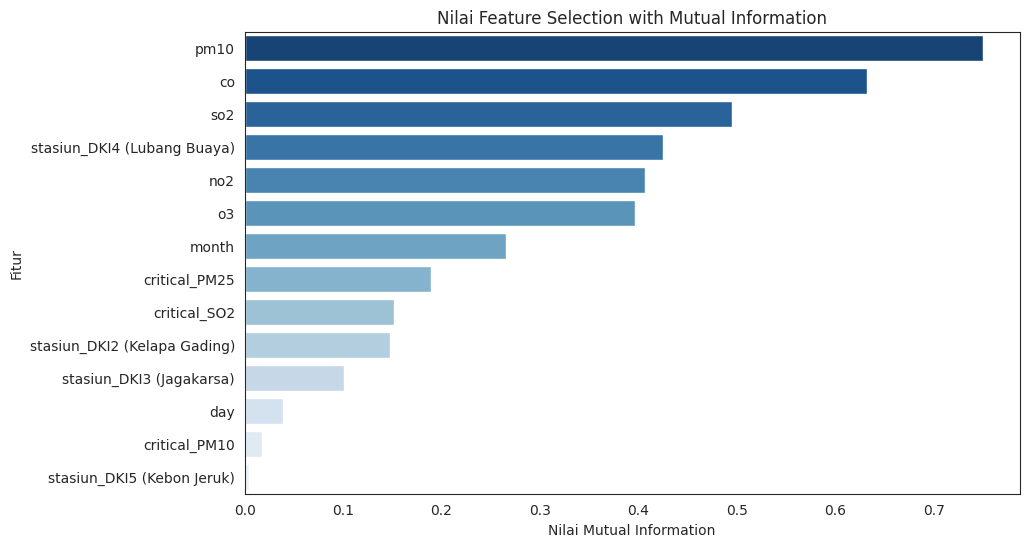

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info, y=mutual_info.index, orient='h', palette='Blues_r', order=mutual_info.sort_values(ascending=False).index)
plt.xlabel('Nilai Mutual Information')
plt.ylabel('Fitur')
plt.title('Nilai Feature Selection with Mutual Information')
plt.show()

In [54]:
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(X_train, y_train)
selected_columns = X_train.columns[sel_ten_cols.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [55]:
X_train.shape[1], X_test.shape[1]

(10, 10)

In [56]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  model_train_accuracy = accuracy_score(y_train, y_train_pred)
  model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
  model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
  #model_train_roc_auc = roc_auc_score(y_train, y_train_pred, average='weighted', multi_class='ovr')

  model_test_accuracy = accuracy_score(y_test, y_test_pred)
  model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
  model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
  #model_test_roc_auc = roc_auc_score(y_test, y_test_pred, average='weighted', multi_class='ovr')

  print(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Accuracy: {:.4f}".format(model_train_accuracy))
  print('- F1 Score: {:.4f}'.format(model_train_f1))

  print('- Recall: {:.4f}'.format(model_train_recall))
  print('- Precision: {:.4f}'.format(model_train_precision))
  #print('- ROC AUC Score: {:.4f}'.format(model_train_roc_auc))



  print('----------------------------------')


  print('Model performance for Test set')
  print('- Accuracy: {:.4f}'.format(model_test_accuracy))
  print('- F1 Score: {:.4f}'.format(model_test_f1))

  print('- Recall: {:.4f}'.format(model_test_recall))
  print('- Precision: {:.4f}'.format(model_test_precision))
  #print('- ROC AUC Score: {:.4f}'.format(model_test_roc_auc))



  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8573
- F1 Score: 0.8513
- Recall: 0.8573
- Precision: 0.8588
----------------------------------
Model performance for Test set
- Accuracy: 0.8584
- F1 Score: 0.8552
- Recall: 0.8584
- Precision: 0.8560


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Recall: 1.0000
- Precision: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9513
- F1 Score: 0.9515
- Recall: 0.9513
- Precision: 0.9520


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.9392
- F1 Score: 0.9384
- Recall: 0.9392
- Precision: 0.9402
----------------------------------
Model performance for Test set
- Accuracy: 0.9381
- F1 Score: 0.9371
- Recall: 0.9381
- Precision: 0.9411


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Recall: 1.0000
- Precision: 1.0000
----------------------------------
Model performance for Test s

In [57]:
rfc_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'n_estimators': [100, 200, 300]
}

dtr_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

svc_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [58]:
random_cv_models = [
    ('Lr', LogisticRegression(), lr_params),
    ('Rfc', RandomForestClassifier(), rfc_params),
    ('Knn', KNeighborsClassifier(), knn_params),
    ('Dtr', DecisionTreeClassifier(), dtr_params),
    ('Svc', SVC(), svc_params)
]
random_cv_models

[('Lr',
  LogisticRegression(),
  {'C': [0.001, 0.01, 0.1, 1, 10, 100],
   'penalty': ['l1', 'l2'],
   'solver': ['liblinear', 'saga']}),
 ('Rfc',
  RandomForestClassifier(),
  {'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 4, 6, 8, 10],
   'min_samples_leaf': [1, 2, 4, 6, 8, 10],
   'n_estimators': [100, 200, 300]}),
 ('Knn',
  KNeighborsClassifier(),
  {'n_neighbors': [3, 5, 7, 9],
   'weights': ['uniform', 'distance'],
   'p': [1, 2]}),
 ('Dtr',
  DecisionTreeClassifier(),
  {'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 4, 6, 8, 10],
   'min_samples_leaf': [1, 2, 4, 6, 8, 10]}),
 ('Svc',
  SVC(),
  {'C': [0.001, 0.01, 0.1, 1, 10, 100],
   'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   'gamma': ['scale', 'auto']})]

In [59]:
model_params = {}

for name, model, params in random_cv_models:
  random = RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              cv=3,
                              n_iter=10,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=2)
  random.fit(X_train, y_train)
  model_params[name] = random.best_params_


for model_name in model_params:
  print(f'------------- Best Params for {model_name} ---------------')
  print(model_params[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
------------- Best Params for Lr ---------------
{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
------------- Best Params for Rfc ---------------
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15}
------------- Best Params for Knn ---------------
{'weights': 'distance', 'p': 1, 'n_neighbors': 3}
------------- Best Params for Dtr ---------------
{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
------------- Best Params for Svc ---------------
{'kernel': 'linear', 'gamma': 'auto', 'C': 100}


------------- Lr ---------------
Training Accuracy: 0.8971
- F1 Score: 0.8938
- Recall: 0.8971
- Precision: 0.9032
----------------------------------
Test Accuracy: 0.8894
- F1 Score: 0.8869
- Recall: 0.8894
- Precision: 0.8921
----------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        81
           1       0.89      0.73      0.80        70
           2       0.81      0.92      0.86        75

    accuracy                           0.89       226
   macro avg       0.89      0.88      0.88       226
weighted avg       0.89      0.89      0.89       226



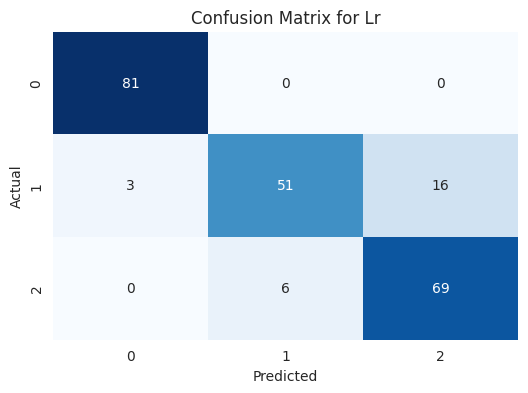

------------- Rfc ---------------
Training Accuracy: 0.9801
- F1 Score: 0.9801
- Recall: 0.9801
- Precision: 0.9802
----------------------------------
Test Accuracy: 0.9513
- F1 Score: 0.9515
- Recall: 0.9513
- Precision: 0.9517
----------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.92      0.93      0.92        70
           2       0.93      0.93      0.93        75

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



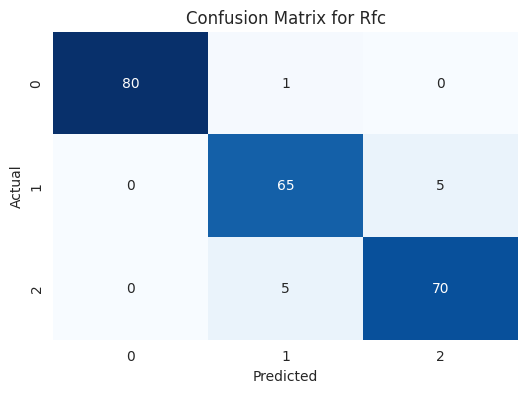

------------- Knn ---------------
Training Accuracy: 1.0000
- F1 Score: 1.0000
- Recall: 1.0000
- Precision: 1.0000
----------------------------------
Test Accuracy: 0.9513
- F1 Score: 0.9506
- Recall: 0.9513
- Precision: 0.9539
----------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       0.98      0.86      0.92        70
           2       0.90      0.99      0.94        75

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



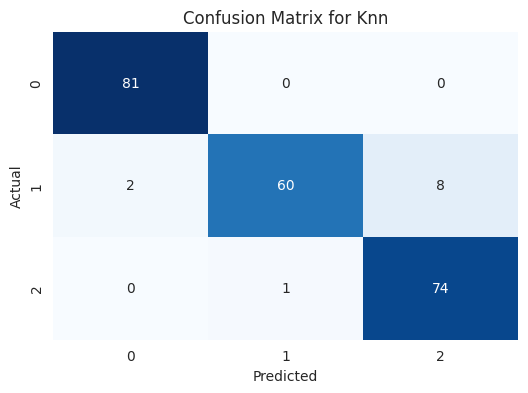

------------- Dtr ---------------
Training Accuracy: 0.9679
- F1 Score: 0.9680
- Recall: 0.9679
- Precision: 0.9682
----------------------------------
Test Accuracy: 0.9115
- F1 Score: 0.9125
- Recall: 0.9115
- Precision: 0.9144
----------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        81
           1       0.84      0.89      0.86        70
           2       0.89      0.89      0.89        75

    accuracy                           0.91       226
   macro avg       0.91      0.91      0.91       226
weighted avg       0.91      0.91      0.91       226



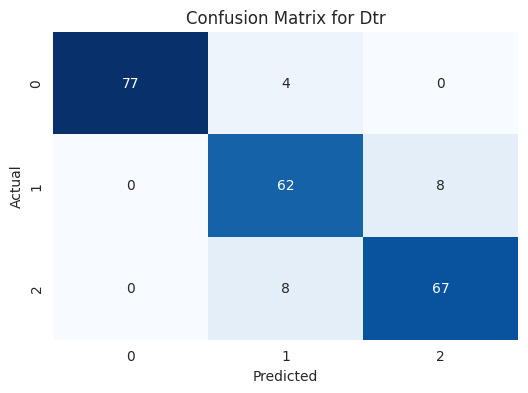

------------- Svc ---------------
Training Accuracy: 0.9204
- F1 Score: 0.9193
- Recall: 0.9204
- Precision: 0.9209
----------------------------------
Test Accuracy: 0.9204
- F1 Score: 0.9199
- Recall: 0.9204
- Precision: 0.9202
----------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       0.89      0.84      0.87        70
           2       0.87      0.91      0.89        75

    accuracy                           0.92       226
   macro avg       0.92      0.92      0.92       226
weighted avg       0.92      0.92      0.92       226



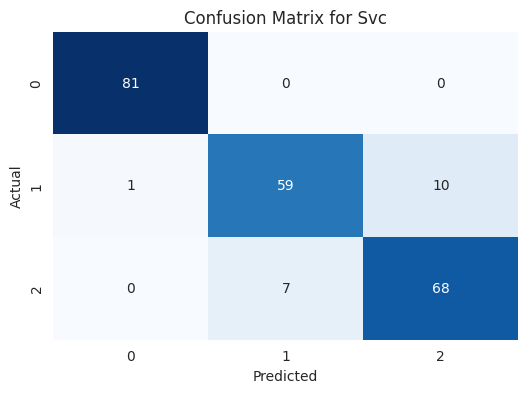

In [60]:
models_params_grid = {
    'Lr': LogisticRegression(),
    'Rfc': RandomForestClassifier(),
    'Knn': KNeighborsClassifier(),
    'Dtr': DecisionTreeClassifier(),
    'Svc': SVC()
}

fitted_models = {}
for i in range(len(list(models_params_grid))):
  model_name = list(models_params_grid.keys())[i]
  model = list(models_params_grid.values())[i]

  model.set_params(**model_params[model_name])
  model.fit(X_train, y_train)
  fitted_models[model_name] = model

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  train_recall = recall_score(y_train, y_train_pred, average='weighted')
  train_precision = precision_score(y_train, y_train_pred, average='weighted')

  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  test_recall = recall_score(y_test, y_test_pred, average='weighted')
  test_precision = precision_score(y_test, y_test_pred, average='weighted')

  print(f'------------- {model_name} ---------------')
  print(f'Training Accuracy: {train_accuracy:.4f}')
  print('- F1 Score: {:.4f}'.format(train_f1))
  print('- Recall: {:.4f}'.format(train_recall))
  print('- Precision: {:.4f}'.format(train_precision))

  print('----------------------------------')

  print(f'Test Accuracy: {test_accuracy:.4f}')
  print('- F1 Score: {:.4f}'.format(test_f1))
  print('- Recall: {:.4f}'.format(test_recall))
  print('- Precision: {:.4f}'.format(test_precision))

  print('----------------------------------')

  print(f'Classification Report:')
  print(classification_report(y_test, y_test_pred))

  cm = confusion_matrix(y_test, y_test_pred)

  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title(f'Confusion Matrix for {model_name}')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  print('='*50)

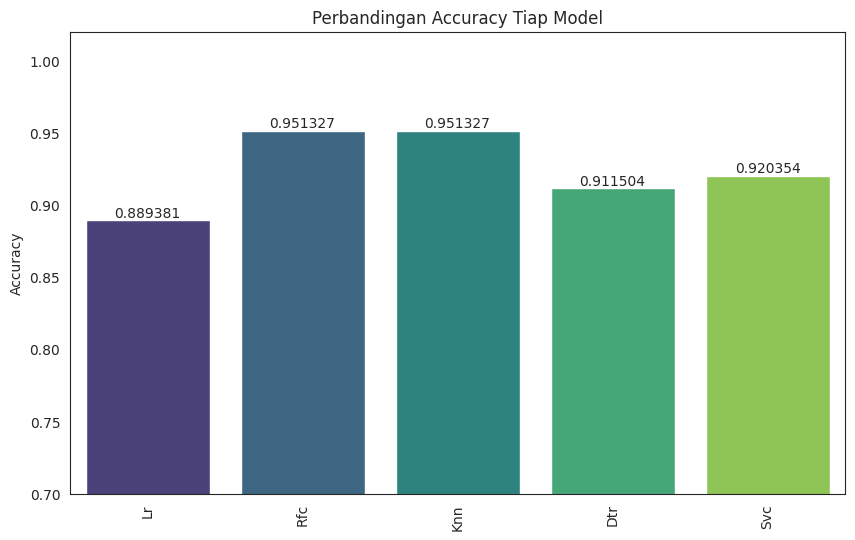

In [61]:
models = ['Lr', 'Rfc', 'Knn', 'Dtr', 'Svc']

accuracy = []
for model_name in models:
    model = fitted_models[model_name]
    y_test_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    accuracy.append(acc)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracy, palette='viridis')
for container in ax.containers:
  ax.bar_label(container, size=10, label_type='edge')
plt.xticks(rotation=90)
plt.ylim(0.7, 1.02)
plt.ylabel('Accuracy')
plt.title('Perbandingan Accuracy Tiap Model')
plt.show()

Cross-Validation Accuracy Scores for Lr: [0.88950276 0.88950276 0.86740331 0.89502762 0.9       ]
Mean Accuracy for Lr: 0.8883
--------------------------------------------------
Cross-Validation Accuracy Scores for Rfc: [0.92265193 0.96132597 0.93370166 0.93922652 0.95      ]
Mean Accuracy for Rfc: 0.9414
--------------------------------------------------
Cross-Validation Accuracy Scores for Knn: [0.91712707 0.91712707 0.90607735 0.9281768  0.91111111]
Mean Accuracy for Knn: 0.9159
--------------------------------------------------
Cross-Validation Accuracy Scores for Dtr: [0.93922652 0.93922652 0.91160221 0.92265193 0.91111111]
Mean Accuracy for Dtr: 0.9248
--------------------------------------------------
Cross-Validation Accuracy Scores for Svc: [0.90607735 0.8839779  0.90055249 0.88950276 0.91666667]
Mean Accuracy for Svc: 0.8994
--------------------------------------------------


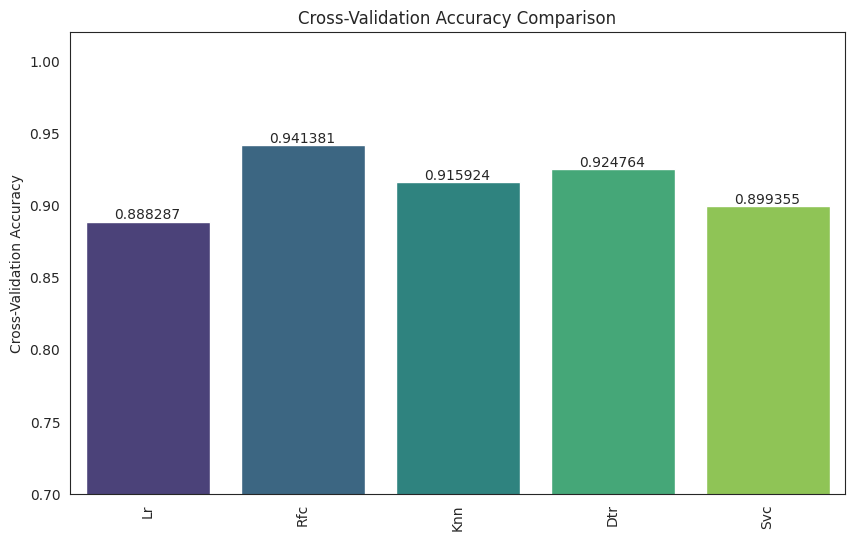

In [62]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = ['Lr', 'Rfc', 'Knn', 'Dtr', 'Svc']

cv_scores = {}
for model_name in models:
    model = fitted_models[model_name]
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

    cv_scores[model_name] = scores.mean()

    print(f'Cross-Validation Accuracy Scores for {model_name}: {scores}')
    print(f'Mean Accuracy for {model_name}: {scores.mean():.4f}')
    print('-' * 50)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()), palette='viridis')
for container in ax.containers:
  ax.bar_label(container, size=10, label_type='edge')
plt.xticks(rotation=90)
plt.ylim(0.7, 1.02)
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.show()

## Testing

In [63]:
X_train.columns

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'month',
       'stasiun_DKI2 (Kelapa Gading)', 'stasiun_DKI4 (Lubang Buaya)',
       'critical_PM25', 'critical_SO2'],
      dtype='object')

In [64]:
# test_df = pd.DataFrame({
#     'pm10': [31.467642],
#     'pm25': [44.508593],
#     'so2': [41.0],
#     'co': [7.0],
#     'o3': [42.204753],
#     'no2': [11.918099],
#     'max': [45.081901]
# })

# rfc_model = fitted_models['Rfc']
# rfc_prediction = rfc_model.predict(test_df)
# print('Prediction for test data:', rfc_prediction[0])

In [65]:
X_train[:1]

pm10   so2    co    o3   no2  month  stasiun_DKI2 (Kelapa Gading)  \
792  66.0  52.0  17.0  51.0  43.0      6                           0.0   

     stasiun_DKI4 (Lubang Buaya)  critical_PM25  critical_SO2  
792                          1.0            1.0           0.0

In [66]:
y_train[:1]

792    2
Name: categori, dtype: int64

In [67]:
le.classes_

array(['BAIK', 'SEDANG', 'TIDAK SEHAT'], dtype=object)